In [7]:
import NumPy_OneTickQuery
import datetime
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
argument_string = ""
argument_string += " -context 'DEFAULT'"
argument_string += " -otq_file 'C:/OMD/client_data/otqs/vwap.otq'"
argument_string += " -s '20050103093000'"
argument_string += " -e '20050103160000'"
argument_string += " -otq_params  BucketIntSec=600"

symbol_specs = []
symbol_specs.append( ("FULL_DEMO_L1::IBM", []) ) 
symbol_specs.append( ("FULL_DEMO_L1::MSFT", []) )
symbol_specs.append( ("FULL_DEMO_L1::CSCO", []) )

In [3]:
print(datetime.datetime.now())
X = NumPy_OneTickQuery.run_query([argument_string , symbol_specs ] )
print(datetime.datetime.now())

2016-10-03 17:16:54.544373
2016-10-03 17:16:54.626087


In [4]:
data = {}

n_symbols = len(X)
for s in range(n_symbols):
	symbol =  X[s][0]
	symbol_data = X[s][1]
	symbol_error_warning = X[s][2]
	symbol_query_label_name = X[s][3]


	if len(symbol_error_warning) > 0:
		print('Skipping bad symbol '+symbol)
		print(symbol_error_warning)
	else:
		if len(symbol_data)==0: 
			print('Skipping no-data symbol '+symbol)
			continue
		data[symbol] = {}
		n_fields = len(symbol_data)
		for k in range(n_fields):
			field_name =  X[s][1][k][0]
			data[symbol][field_name] = X[s][1][k][1]
		print('N ticks for ', symbol,': ',len(data[symbol][field_name]))

			
print(data)

N ticks for  FULL_DEMO_L1::IBM :  39
N ticks for  FULL_DEMO_L1::MSFT :  39
N ticks for  FULL_DEMO_L1::CSCO :  39
{'FULL_DEMO_L1::MSFT': {'SUM': array([ 6819832.,  1924704.,  1749500.,  2515781.,  2341606.,  1782253.,
        2392792.,  2624656.,  2364308.,  1121267.,  1417530.,   925044.,
        1024082.,   433209.,   514621.,   966369.,   775599.,   591275.,
         328357.,   784487.,   572457.,   998160.,   460973.,  1260293.,
         889183.,   921999.,   675973.,   762382.,   705036.,   875863.,
         966930.,  1530804.,  1192893.,  1619722.,  1647825.,  1236384.,
        2131743.,  1695450.,  2690426.]), 'AVERAGE': array([ 26.87599348,  26.87618378,  26.85291795,  26.82655421,
        26.77966307,  26.74936659,  26.6936903 ,  26.70998383,
        26.74703113,  26.72213068,  26.72251309,  26.72618805,
        26.73425371,  26.73389415,  26.74349359,  26.71279209,
        26.70640231,  26.69607874,  26.69444379,  26.71817957,
        26.72841452,  26.72764373,  26.73373915,  

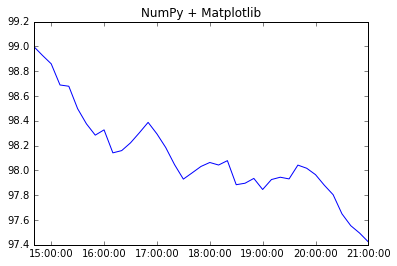

In [8]:
# Use numpy + matplotlib
vwap_CSCO = X[0][1][1][1]
ts = X[0][1][0][1]
plt.plot(ts,vwap_CSCO)
plt.title('NumPy + Matplotlib')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000011C2BE0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AC18BA8>], dtype=object)

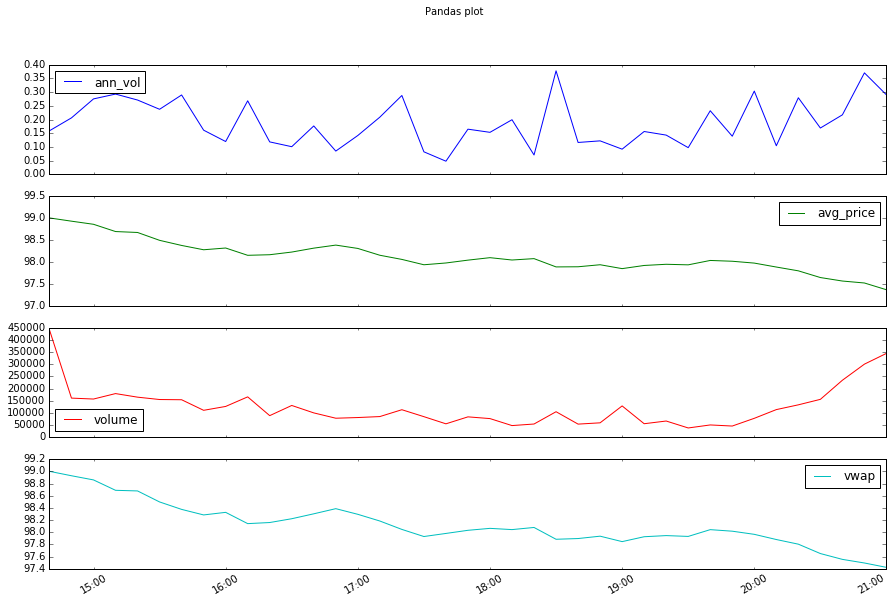

In [11]:
# Put data in pandas DataFrame and make simple plots
df_CSCO = pd.DataFrame({'vwap':X[0][1][1][1], 'avg_price':X[0][1][3][1], 
				'ann_vol':X[0][1][4][1], 'volume':X[0][1][2][1]}, 
                	index=X[0][1][0][1])
                 
#print(df_CSCO.index)
df_CSCO.plot(subplots=True, figsize=(15,10), title='Pandas plot')